# 중심을 대표 값 - 평균

In [ ]:
import numpy as np
# 산술평균
data = [10, 20, 30, 40, 50, 60]
mean_value = np.mean(data)
print(mean_value)  # 30.0

30.0


# pip install scipy 

In [2]:
# 기하평균
from scipy.stats import hmean, gmean
gmean(data)


np.float64(26.051710846973528)

In [3]:
#조화평균
hmean(data)

np.float64(21.8978102189781)

In [4]:
#가중평균
# 가격과 개수
prices = [5000, 9000]
counts = [8, 2]

np.average(prices, weights=counts)


np.float64(5800.0)

# 대표값 - 중앙값

In [5]:
data

[10, 20, 30, 40, 50]

# 백분위수

In [8]:
import numpy as np

#scores = [65, 75, 80, 85, 95]
scores = [15, 75, 80, 85, 95]
p25 = np.percentile(scores, 25) #Q1
p50 = np.percentile(scores, 50) #Q2, median
p75 = np.percentile(scores, 75) #Q3

p25, p50, p75

(np.float64(75.0), np.float64(80.0), np.float64(85.0))

In [7]:
# IQR : 사분위범위 Q3-Q1 = 85-75 = 10
p75-p25

np.float64(10.0)

중앙값, 분위수는 개수(위치)를 중요시하는 통계량
이상값/극단적인 값이 중요하지 않다.

# 대표값 - 최빈값

In [9]:
import pandas as pd

data = pd.Series([1, 2, 2, 3, 3, 3, 4, 4])
mode_value = data.mode()
print(mode_value)  # 3 (가장 많이 등장한 값)

0    3
dtype: int64


# 범위의 계산 > 변동성을 측정하는 일반적인 지표 > 극단적인값에 민감

- 최대/최소 2개의 값만 사용
- 개별점수들이 다른 점수들과 얼마나 차이가 있나x
- 실제 데이터가 어떤 값들로 구성되어 잇는지를 설명할 수 없다.


In [10]:
data = [10, 20, 30, 40, 50]
range_value = max(data) - min(data)
print(range_value)  # 40

40


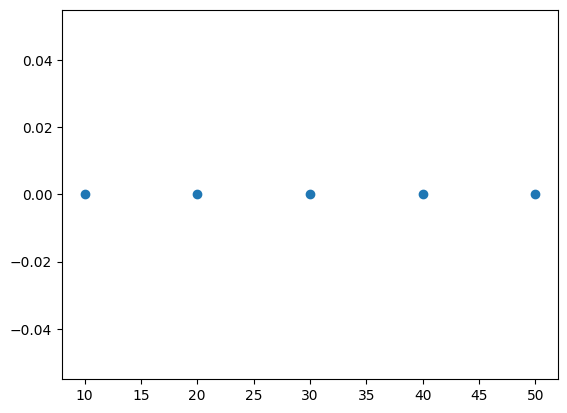

In [13]:
import matplotlib.pyplot as plt
plt.scatter(data, np.zeros_like(data))

In [14]:
import seaborn as sns

vp_df = sns.load_dataset('iris')
vp_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
#sepal_length 의 범위
vp_df['sepal_length'].max() - vp_df['sepal_length'].min()

np.float64(3.6000000000000005)

In [16]:
# 모든 속성의 범위를 확인
# 반복문
for col in vp_df.columns:
    if pd.api.types.is_numeric_dtype(vp_df[col]):
        print(f"{col}의 범위: {vp_df[col].max() - vp_df[col].min()}")  
    else:
      pass

sepal_length의 범위: 3.6000000000000005
sepal_width의 범위: 2.4000000000000004
petal_length의 범위: 5.9
petal_width의 범위: 2.4


변동성이 가장 큰 속성은 petal_length입니다.
petal_length와 petal_width가 sepal_length와 sepal_width보다 상대적으로 변동성이 큽니다.

모델 생성시에 다루어야하는 속성으로 볼 수 있습니다.


In [ ]:
# 산포도로 변동성 확인하기
#petal_length와 petal_width
#sepal_length와 sepal_width

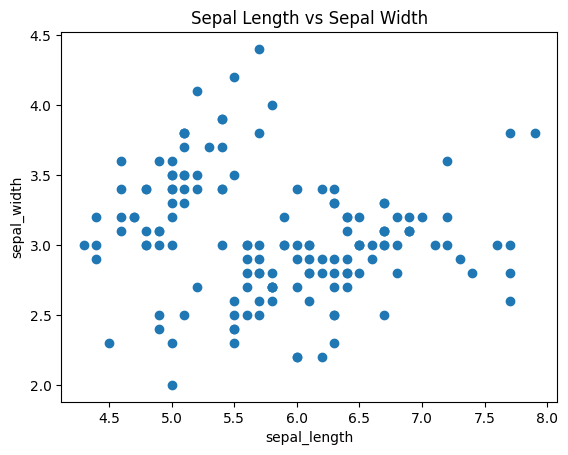

In [17]:
import matplotlib.pyplot as plt
plt.scatter(vp_df['sepal_length'], vp_df['sepal_width'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Sepal Length vs Sepal Width')
plt.show()

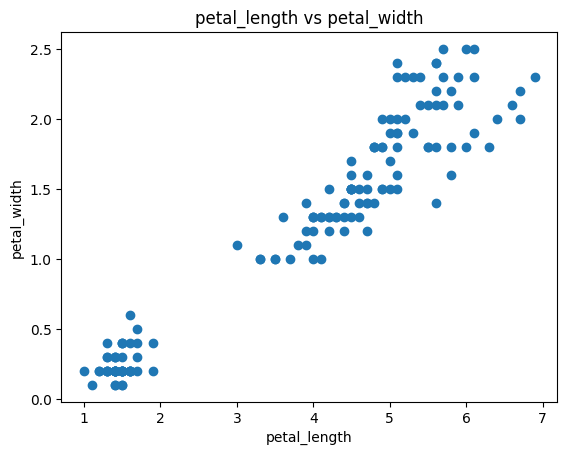

In [18]:
import matplotlib.pyplot as plt
plt.scatter(vp_df['petal_length'], vp_df['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('petal_length vs petal_width')
plt.show()

산포도를 이용해 극단적으로 다른 데이터(이상치)가 있는지를 확인해야 한다.

# 분산

In [19]:
import numpy as np

data = [10, 20, 30, 40, 50]
variance_value = np.var(data)
print(variance_value)  # 200.0

200.0


In [20]:
import numpy as np

std_dev = np.std(data)
print(std_dev)  # 14.14

14.142135623730951


# 표준편차의 비교

In [21]:
# sd의 비교
import numpy as np
import matplotlib.pyplot as plt

# 평균과 표준편차 설정
mu = 100
sd1 = 10
sd2 = 50

# 정규분포 데이터 생성
data1 = np.random.normal(mu, sd1, 10000)
data2 = np.random.normal(mu, sd2, 10000)

In [22]:
bins = np.arange(0,240, 10)
bins

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230])

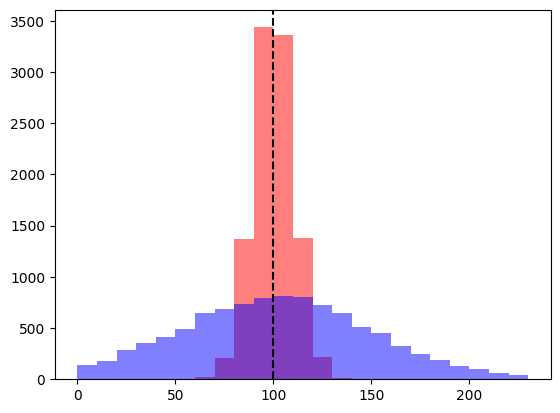

In [27]:
plt.hist(data1, bins=bins, color='red', alpha=0.5)
plt.hist(data2, bins=bins, color='blue', alpha=0.5)

#평균선 표시
plt.axvline(mu, color='black', linestyle='--')


In [ ]:
#iris dataset 의 속성들의 표준편차 비교분석

# 사분위범위

In [28]:
numeric_df = vp_df.select_dtypes(include=['float64', 'int'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3-Q1

summ = pd.DataFrame({'Q1': Q1,
              'Q3': Q3,
              'IQR': IQR,})
summ

,Q1,Q3,IQR
sepal_length,5.1,6.4,1.3
sepal_width,2.8,3.3,0.5
petal_length,1.6,5.1,3.5
petal_width,0.3,1.8,1.5


가장 분산이 큰 변수 : petal_length
가장 분산이 작은 변수 : sepal_width
품종을 분류할 때, petal_length 가 민감하게 작용할 것이다. 식별력이 크다.
** IQR의 크기 > 이상치의 허용범위가 크다

# 분포의 모양, 형태

- 모양이 정규분포인지
- 치우쳐져 있는가 / 좌/우, 위/아래
- 특이한 패턴이 있는가 / 쌍봉

# 빈도분포표

In [29]:
import pandas as pd
import numpy as np

# 데이터 입력
data = [
    [47, 10, 31, 25, 20],
    [2, 11, 31, 25, 21],
    [44, 14, 15, 26, 21],
    [41, 14, 16, 26, 21],
    [7, 30, 17, 27, 24],
    [6, 30, 16, 29, 24],
    [35, 32, 15, 29, 23],
    [38, 33, 19, 28, 20],
    [35, 34, 18, 29, 21],
    [36, 32, 16, 27, 20],
]

# DataFrame으로 변환
df = pd.DataFrame(data, columns=['A', 'B', 'C', 'D', 'E'])
df

,A,B,C,D,E
0,47,10,31,25,20
1,2,11,31,25,21
2,44,14,15,26,21
3,41,14,16,26,21
4,7,30,17,27,24
5,6,30,16,29,24
6,35,32,15,29,23
7,38,33,19,28,20
8,35,34,18,29,21
9,36,32,16,27,20


- 각 변수의 분포 형태 : 5개의 변수
- 값의 범위, 도수가 많은 구간 (count) 빈도
- 이상치 유무

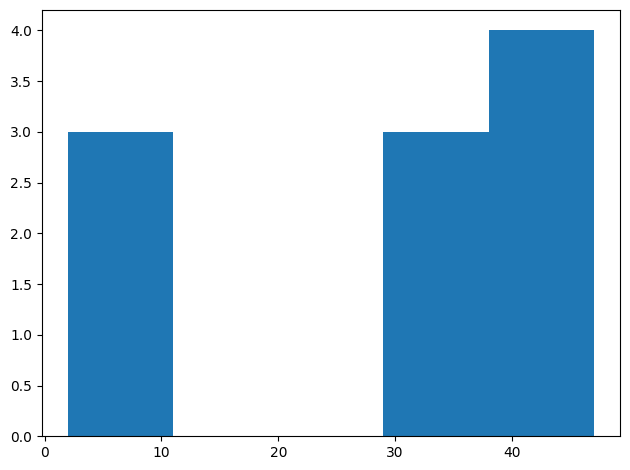

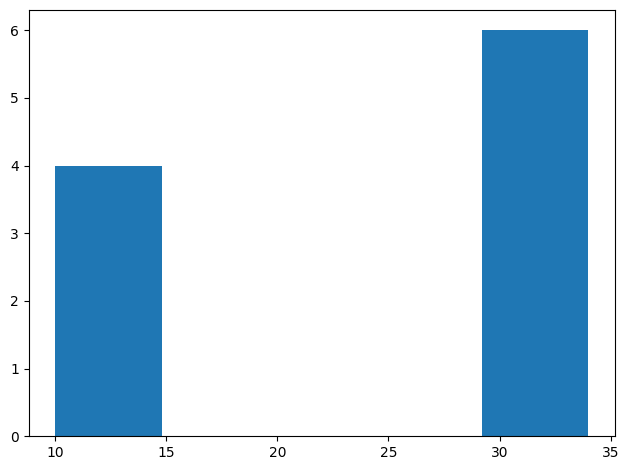

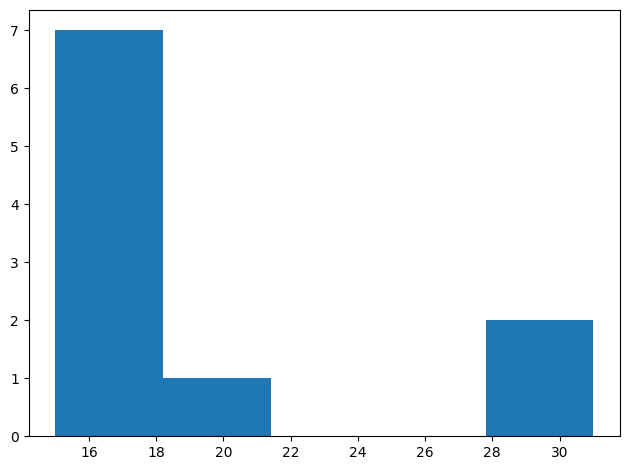

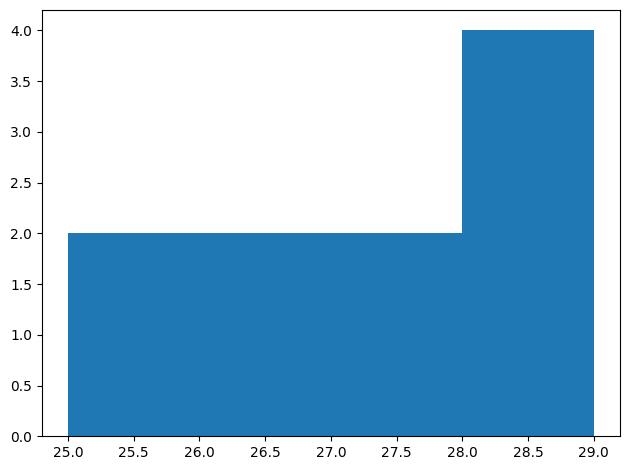

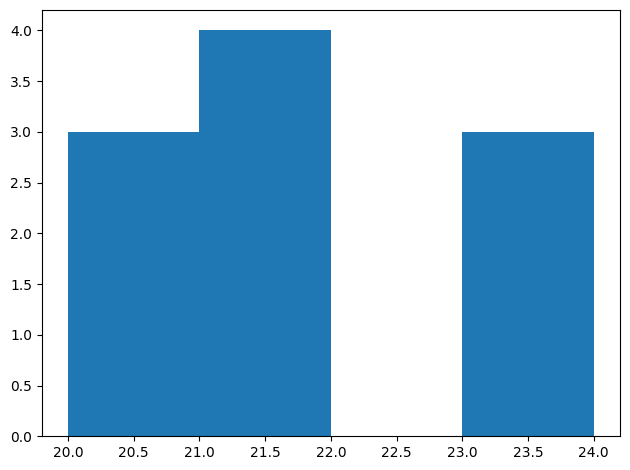

In [33]:
#각 속성별로 히스토그램
for col in df.columns:
  plt.hist(df[col], bins='sturges')
  plt.tight_layout()
  plt.show()

In [34]:
from scipy.stats import kurtosis

kurtosis_value = kurtosis(data)
print(kurtosis_value)

[-1.20858977 -1.72253932  0.04612341 -1.44440419 -1.05185185]


0 : 정규 분포
양수 첨도 : 정규분포보다 그만큼 뾰족하다 > 꼬리가 두껍다(길다)
음수 첨도 : 정규분포보다 그만큼 눌려있다 > 꼬리가 얇다(짧다) : 데이터가 평균 주변에 고르다

In [ ]:
#iris data로 첨도의 계산